# Preprocessing

In [ ]:
import pandas as pd
import io
from google.colab import files
import sklearn
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.optimizers import SGD
                                              
uploaded = files.upload()

Saving phpbL6t4U_train_9.csv to phpbL6t4U_train_9.csv


In [ ]:
gaz = pd.read_csv(io.BytesIO(uploaded['phpbL6t4U_train_9.csv']), sep =',', header = None)

In [ ]:
print(gaz.describe())

                 0             1    ...           127           128
count   11128.000000  11128.000000  ...  11128.000000  11128.000000
mean    50588.007655      6.577531  ...    -16.184329      3.376797
std     69399.496233      7.434113  ...     21.243745      1.728313
min    -12826.543000      0.176524  ...   -410.152297      1.000000
25%      6715.344550      2.283548  ...    -18.928522      2.000000
50%     19382.461300      3.871971  ...    -11.737865      3.000000
75%     63204.859250      8.502677  ...     -6.462631      5.000000
max    668677.085900    171.976380  ...      8.357968      6.000000

[8 rows x 129 columns]


In [ ]:
gaz.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,14.0652,1.021431,0.076162,0.345285,2.738004,-0.058404,-0.277899,-2.333253,1536.7488,1.400258,0.503626,1.049651,4.229569,-0.274414,-0.697501,-4.584853,2354.3862,1.322208,0.861047,1.452642,7.131562,-0.410640,-1.085102,-7.057642,2562.4917,1.324152,0.961666,1.546818,6.892549,-0.444637,-1.128489,-7.754008,934.0268,1.475627,0.278955,0.682825,4.245845,-0.176600,-0.486719,-3.482637,...,1.235104,0.505597,0.873333,4.071564,-0.271055,-0.614935,-3.671637,1505.0838,1.585151,0.408910,0.784679,2.616234,-0.256397,-0.532460,-3.034191,1624.0852,1.627958,0.444254,0.798408,3.000386,-0.284563,-0.567359,-2.999751,2184.0698,1.347984,0.539084,0.898619,3.878992,-0.389906,-0.785156,-4.407278,1973.4453,1.360274,0.494020,0.873188,3.694443,-0.344503,-0.655650,-3.430285,3
1,4046.4018,1.744527,1.227569,1.813976,4.431709,-0.907550,-1.247994,-3.670596,7687.0108,2.549173,2.557602,3.861304,6.452142,-1.721194,-2.260036,-4.635464,18101.8657,10.910528,6.585194,10.377547,12.737590,-3.237315,-4.849945,-10.359915,20147.2206,11.360018,7.268149,11.325731,13.652203,-3.514875,-5.198500,-10.095357,6221.3495,6.448052,2.348059,4.621311,6.471085,-1.537581,-2.600977,-4.838204,...,8.382372,5.347558,8.306079,10.453390,-2.569729,-3.975129,-8.398585,6721.1780,7.519613,2.485778,4.715077,7.852208,-1.729003,-3.030043,-6.016871,7395.4884,8.357009,2.652364,4.809075,8.956217,-1.960666,-3.311898,-6.659602,13536.1324,6.299667,6.904400,13.749932,18.433950,-3.106225,-5.405381,-11.371179,12122.2839,6.135079,6.115637,12.161950,15.576468,-2.743554,-4.836195,-8.346636,3
2,4918.8169,2.192877,1.541389,2.295607,5.058815,-37.090439,-69.361612,-639.547180,10205.0566,3.586874,3.548987,5.411704,7.586672,-41.941650,-87.272594,-902.250826,20503.7717,11.862207,8.026235,13.373056,16.297328,-13.276188,-21.042029,-47.692397,22728.2268,12.095187,8.824536,14.780699,18.056064,-12.691301,-19.888843,-43.405982,7568.1230,7.245981,2.891934,5.844090,8.032403,-2.989172,-4.897467,-9.675071,...,8.988214,6.454690,10.654522,13.363183,-12.765134,-20.231062,-53.193418,8277.7183,8.628880,3.085191,5.954400,9.541636,-3.308270,-5.662689,-12.164350,9430.4580,9.824441,3.303340,6.221615,9.593928,-2.828776,-4.752476,-8.253733,15106.6431,6.809725,7.883305,16.892547,21.734575,-26.569975,-48.613726,-121.517714,13525.0422,6.697454,7.016928,14.765672,19.271910,-22.234264,-41.372325,-99.788098,3
3,507.9878,2.130980,0.115009,0.335874,2.598176,-0.052970,-0.263984,-2.729686,41976.7431,4.654036,8.826130,11.512599,19.376149,-6.775106,-10.507401,-35.083440,5938.7854,2.765202,1.358196,2.488345,6.242150,-1.021006,-1.778233,-7.225966,6021.0078,2.687641,1.392464,2.619034,6.993986,-1.024156,-1.790214,-7.424393,1610.6813,1.922122,0.443975,1.123695,4.092391,-0.310566,-0.773011,-4.257648,...,2.699479,1.195207,2.058599,3.611709,-0.914159,-1.440184,-4.026725,2402.3638,2.079635,0.675432,1.579753,3.774505,-0.421480,-0.804022,-3.255582,2442.9395,2.095833,0.686327,1.518545,3.682695,-0.420433,-0.761295,-2.973219,8944.9248,2.988908,1.985467,3.810648,5.979951,-1.591878,-2.548773,-6.014547,7922.0380,2.904511,1.787390,3.324320,6.172905,-1.412451,-2.174529,-5.750028,5
4,5112.2241,2.198418,1.353879,2.310209,5.475477,-0.812125,-1.406757,-6.040008,26552.0454,4.943071,8.681239,15.247967,20.792647,-4.647062,-6.954448,-21.373610,3730.9099,2.556917,1.317897,2.680950,5.079122,-0.645479,-1.236600,-5.578664,3862.7180,2.503563,1.354679,2.660313,4.946600,-0.655506,-1.237577,-6.050420,1299.5494,1.887818,0.594943,1.826893,3.835093,-0.279749,-0.690598,-4.162843,...,2.629520,1.295020,2.573740,4.636870,-0.662031,-1.025203,-3.800017,2123.6541,2.145076,1.004152,3.108238,5.707613,-0.418697,-0.755775,-3.428350,2162.4587,2.199735,1.017801,3.000515,5.403264,-0.417297,-0.763522,-2.887297,5976.3128,2.850430,2.211785,5.01922

In [ ]:
gaz = sklearn.utils.shuffle(gaz)

In [ ]:
x = gaz.iloc[:,0:128]

In [ ]:
y = gaz.iloc[:,-1]

In [ ]:
y = to_categorical(y)

In [ ]:
n_train = int(len(gaz.index)*0.8)
trainX , testX = x[:n_train], x[n_train:]
trainy , testy = y[:n_train], y[n_train:]

# Fin du preprocessing

# Test du meilleur modèle PARTIE 1 (layers uniquement)

Nous établissons trois tailles de modèles : original, small, big. Nous testerons sur chacun d'entre eux les régularisations L1, L2 & drop. Nous choissirons le modèle le plus performant pour y appliquer l'optimisation des hyperparamètres.

## Original model (original, drop, L1, L1 & drop, L2, L2 & drop)

In [ ]:
original_model = keras.Sequential(
    [
        keras.layers.Dense(16, activation='relu', input_dim=128),
        keras.layers.Dense(16, activation='relu', input_dim=128),
        keras.layers.Dense(7, activation='sigmoid')
    ]
)

original_model.compile(optimizer='rmsprop',
                       loss='categorical_crossentropy', metrics=["acc"])

In [ ]:
drop_model = keras.Sequential(
    [
        keras.layers.Dense(16, activation='relu', input_dim=128),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(16, activation='relu', input_dim=128),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(7, activation='sigmoid')
    ]
)

drop_model.compile(optimizer='rmsprop',
                       loss='categorical_crossentropy', metrics=["acc"])

In [ ]:
l1_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l1(0.001)),
    keras.layers.Dense(16, activation='relu',  input_dim=128, kernel_regularizer= keras.regularizers.l1(0.001)),
    keras.layers.Dense(7, activation='sigmoid')
])
l1_model.compile(optimizer='rmsprop',
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])


In [ ]:
l1_model_drop = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l1(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu',  input_dim=128, kernel_regularizer= keras.regularizers.l1(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation='sigmoid')
])
l1_model_drop.compile(optimizer='rmsprop',
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])

In [ ]:
l2_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dense(16, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dense(7, activation='sigmoid')
])
l2_model.compile(optimizer='rmsprop',
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])


In [ ]:
l2_model_drop = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu', input_dim=128, kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation='sigmoid')
])
l2_model_drop.compile(optimizer='rmsprop',
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])


## Small model (small, drop, L1, L1 & drop, L2, L2 & drop)

In [ ]:
smaller_model = keras.Sequential(
    [
        keras.layers.Dense(4, activation='relu', input_dim=128),
        keras.layers.Dense(4, activation='relu', input_dim=128),
        keras.layers.Dense(7, activation='sigmoid')
    ]
)

smaller_model.compile(optimizer='rmsprop',
                       loss='categorical_crossentropy', metrics=["acc"])

In [ ]:
smaller_drop_model = keras.Sequential(
    [
        keras.layers.Dense(4, activation='relu', input_dim=128),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4, activation='relu', input_dim=128),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(7, activation='sigmoid')
    ]
)

smaller_drop_model.compile(optimizer='rmsprop',
                       loss='categorical_crossentropy', metrics=["acc"])

In [ ]:
smaller_l1_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l1(0.001)),
    keras.layers.Dense(4, activation='relu',  input_dim=128, kernel_regularizer= keras.regularizers.l1(0.001)),
    keras.layers.Dense(7, activation='sigmoid')
])
smaller_l1_model.compile(optimizer='rmsprop',
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])


In [ ]:
smaller_l1_model_drop = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l1(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='relu',  input_dim=128, kernel_regularizer= keras.regularizers.l1(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation='sigmoid')
])
smaller_l1_model_drop.compile(optimizer='rmsprop',
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])

In [ ]:
smaller_l2_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dense(4, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dense(7, activation='sigmoid')
])
smaller_l2_model.compile(optimizer='rmsprop',
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])


In [ ]:
smaller_l2_model_drop = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='relu', input_dim=128, kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation='sigmoid')
])
smaller_l2_model_drop.compile(optimizer='rmsprop',
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])


## Big model (big, drop, L1, L1 & drop, L2, L2 & drop)

In [ ]:
bigger_model = keras.Sequential(
    [
        keras.layers.Dense(512, activation='relu', input_dim=128),
        keras.layers.Dense(512, activation='relu', input_dim=128),
        keras.layers.Dense(7, activation='sigmoid')
    ]
)

bigger_model.compile(optimizer='rmsprop',
                       loss='categorical_crossentropy', metrics=["acc"])

In [ ]:
bigger_drop_model = keras.Sequential(
    [
        keras.layers.Dense(512, activation='relu', input_dim=128),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(512, activation='relu', input_dim=128),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(7, activation='sigmoid')
    ]
)

bigger_drop_model.compile(optimizer='rmsprop',
                       loss='categorical_crossentropy', metrics=["acc"])

In [ ]:
bigger_l1_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l1(0.001)),
    keras.layers.Dense(512, activation='relu',  input_dim=128, kernel_regularizer= keras.regularizers.l1(0.001)),
    keras.layers.Dense(7, activation='sigmoid')
])
bigger_l1_model.compile(optimizer='rmsprop',
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])


In [ ]:
bigger_l1_model_drop = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l1(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu',  input_dim=128, kernel_regularizer= keras.regularizers.l1(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation='sigmoid')
])
bigger_l1_model_drop.compile(optimizer='rmsprop',
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])

In [ ]:
bigger_l2_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dense(512, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dense(7, activation='sigmoid')
])
bigger_l2_model.compile(optimizer='rmsprop',
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])


In [ ]:
bigger_l2_model_drop = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu', input_dim=128, kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation='sigmoid')
])
bigger_l2_model_drop.compile(optimizer='rmsprop',
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])


### Nous lançons le fit sur tous les modèles introduits précedemment et nous récupérons leurs historiques

Original model

In [ ]:
original_history = original_model.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 23ms/step - loss: 3828.5332 - acc: 0.1598 - val_loss: 922.3512 - val_acc: 0.4349
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 857.2209 - acc: 0.4227 - val_loss: 575.5682 - val_acc: 0.4668
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 537.4555 - acc: 0.4559 - val_loss: 369.6241 - val_acc: 0.4982
Epoch 4/20
18/18 [==============================] - 0s 6ms/step - loss: 357.5750 - acc: 0.5152 - val_loss: 233.0889 - val_acc: 0.6141
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 215.6473 - acc: 0.6189 - val_loss: 144.6977 - val_acc: 0.7053
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 156.9036 - acc: 0.6843 - val_loss: 95.0350 - val_acc: 0.7749
Epoch 7/20
18/18 [==============================] - 0s 6ms/step - loss: 112.5622 - acc: 0.7254 - val_loss: 115.0154 - val_acc: 0.7026
Epoch 8/20
18/18 [==============================] - 0s 6ms/st

In [ ]:
test_loss_og, test_acc_og = original_model.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 14.7387 - acc: 0.8908


In [ ]:
drop_history = drop_model.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 33ms/step - loss: 19543.4247 - acc: 0.1052 - val_loss: 2826.9424 - val_acc: 0.2044
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 8299.5983 - acc: 0.1490 - val_loss: 1221.0665 - val_acc: 0.2740
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 4479.7173 - acc: 0.1706 - val_loss: 561.6866 - val_acc: 0.2511
Epoch 4/20
18/18 [==============================] - 0s 6ms/step - loss: 2158.7836 - acc: 0.1740 - val_loss: 182.9732 - val_acc: 0.2516
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 750.9286 - acc: 0.1592 - val_loss: 32.7577 - val_acc: 0.1810
Epoch 6/20
18/18 [==============================] - 0s 8ms/step - loss: 185.1770 - acc: 0.1615 - val_loss: 6.9865 - val_acc: 0.3657
Epoch 7/20
18/18 [==============================] - 0s 6ms/step - loss: 45.2695 - acc: 0.1756 - val_loss: 3.0298 - val_acc: 0.2866
Epoch 8/20
18/18 [==============================] - 0s 6ms/s

In [ ]:
test_loss_dpt, test_acc_dpt = drop_model.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 1.8521 - acc: 0.2345


In [ ]:
l1_history = l1_model.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 24ms/step - loss: 2626.6893 - acc: 0.1899 - val_loss: 765.5562 - val_acc: 0.4587
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 638.9018 - acc: 0.4956 - val_loss: 374.0022 - val_acc: 0.5548
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 296.0854 - acc: 0.5627 - val_loss: 154.1297 - val_acc: 0.5602
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 137.8210 - acc: 0.6175 - val_loss: 125.7854 - val_acc: 0.6509
Epoch 5/20
18/18 [==============================] - 0s 6ms/step - loss: 109.6054 - acc: 0.6646 - val_loss: 68.9630 - val_acc: 0.7058
Epoch 6/20
18/18 [==============================] - 0s 6ms/step - loss: 93.5964 - acc: 0.6588 - val_loss: 81.9071 - val_acc: 0.6801
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 94.4928 - acc: 0.6656 - val_loss: 146.7140 - val_acc: 0.7017
Epoch 8/20
18/18 [==============================] - 0s 6ms/step 

In [ ]:
test_loss_l1, test_acc_l1 = l1_model.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 75.4146 - acc: 0.6792


In [ ]:
l1_history_dpt = l1_model_drop.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 23ms/step - loss: 14557.1634 - acc: 0.1411 - val_loss: 2096.8413 - val_acc: 0.1204
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 4855.5917 - acc: 0.1742 - val_loss: 614.4414 - val_acc: 0.1698
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 1522.6119 - acc: 0.2445 - val_loss: 238.9061 - val_acc: 0.3513
Epoch 4/20
18/18 [==============================] - 0s 6ms/step - loss: 468.2791 - acc: 0.2583 - val_loss: 76.7332 - val_acc: 0.2754
Epoch 5/20
18/18 [==============================] - 0s 6ms/step - loss: 120.9550 - acc: 0.2226 - val_loss: 18.2758 - val_acc: 0.2597
Epoch 6/20
18/18 [==============================] - 0s 6ms/step - loss: 26.7921 - acc: 0.2199 - val_loss: 5.3217 - val_acc: 0.2457
Epoch 7/20
18/18 [==============================] - 0s 6ms/step - loss: 8.7341 - acc: 0.2189 - val_loss: 3.0521 - val_acc: 0.2417
Epoch 8/20
18/18 [==============================] - 0s 6ms/step -

In [ ]:
test_loss_l1_dpt, test_acc_l1_dpt = l1_model_drop.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 1.9803 - acc: 0.2358


In [ ]:
l2_history = l2_model.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 27ms/step - loss: 2487.0939 - acc: 0.2391 - val_loss: 425.2119 - val_acc: 0.5234
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 369.9992 - acc: 0.5105 - val_loss: 214.2250 - val_acc: 0.5283
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 208.5033 - acc: 0.5925 - val_loss: 104.1723 - val_acc: 0.6550
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 116.4193 - acc: 0.6696 - val_loss: 118.5896 - val_acc: 0.6078
Epoch 5/20
18/18 [==============================] - 0s 6ms/step - loss: 94.5897 - acc: 0.7012 - val_loss: 69.4269 - val_acc: 0.7251
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 74.4936 - acc: 0.7470 - val_loss: 68.0703 - val_acc: 0.7916
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 61.7141 - acc: 0.7867 - val_loss: 72.2519 - val_acc: 0.7902
Epoch 8/20
18/18 [==============================] - 0s 6ms/step - 

In [ ]:
test_loss_l2, test_acc_l2 = l2_model.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 56.2807 - acc: 0.7453


In [ ]:
l2_history_dpt = l2_model_drop.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 44ms/step - loss: 19310.2850 - acc: 0.1500 - val_loss: 1968.5273 - val_acc: 0.0692
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 8390.8654 - acc: 0.1655 - val_loss: 870.7911 - val_acc: 0.1465
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 4265.4650 - acc: 0.1668 - val_loss: 408.9437 - val_acc: 0.2682
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 1818.5485 - acc: 0.1818 - val_loss: 196.7449 - val_acc: 0.2570
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 538.9719 - acc: 0.1891 - val_loss: 44.3865 - val_acc: 0.2004
Epoch 6/20
18/18 [==============================] - 0s 6ms/step - loss: 145.3760 - acc: 0.1481 - val_loss: 24.0952 - val_acc: 0.1658
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 35.6587 - acc: 0.1445 - val_loss: 7.9726 - val_acc: 0.1523
Epoch 8/20
18/18 [==============================] - 0s 7ms/s

In [ ]:
test_loss_l2_dpt, test_acc_l2_dpt = l2_model_drop.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 1.8935 - acc: 0.2197


Small model

In [ ]:
small_history = smaller_model.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 23ms/step - loss: 3435.1835 - acc: 0.1129 - val_loss: 967.8920 - val_acc: 0.1739
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 853.3466 - acc: 0.2315 - val_loss: 253.3416 - val_acc: 0.3482
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 192.9100 - acc: 0.3246 - val_loss: 34.1255 - val_acc: 0.3252
Epoch 4/20
18/18 [==============================] - 0s 6ms/step - loss: 32.4613 - acc: 0.2983 - val_loss: 7.4498 - val_acc: 0.2978
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 6.7963 - acc: 0.2885 - val_loss: 2.9800 - val_acc: 0.2857
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 3.5588 - acc: 0.2800 - val_loss: 2.1784 - val_acc: 0.2668
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 2.3285 - acc: 0.2604 - val_loss: 2.0098 - val_acc: 0.2480
Epoch 8/20
18/18 [==============================] - 0s 6ms/step - loss: 2.31

In [ ]:
test_loss_sm, test_acc_sm = smaller_model.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 1.8950 - acc: 0.2170


In [ ]:
drop_history_sm = smaller_drop_model.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 24ms/step - loss: 11111.8717 - acc: 0.1433 - val_loss: 5074.1738 - val_acc: 0.2161
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 6501.6877 - acc: 0.1693 - val_loss: 2904.0007 - val_acc: 0.2179
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 3605.7727 - acc: 0.2122 - val_loss: 1233.5388 - val_acc: 0.4353
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 1391.4530 - acc: 0.2198 - val_loss: 271.1489 - val_acc: 0.4102
Epoch 5/20
18/18 [==============================] - 0s 6ms/step - loss: 342.7185 - acc: 0.2425 - val_loss: 67.7306 - val_acc: 0.3428
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 89.6057 - acc: 0.2232 - val_loss: 21.9932 - val_acc: 0.2677
Epoch 7/20
18/18 [==============================] - 0s 6ms/step - loss: 37.5572 - acc: 0.2147 - val_loss: 11.7089 - val_acc: 0.2385
Epoch 8/20
18/18 [==============================] - 0s 7ms

In [ ]:
test_loss_dpt_sm, test_acc_dpt_sm = smaller_drop_model.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 1.8640 - acc: 0.2332


In [ ]:
l1_history_sm = smaller_l1_model.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 23ms/step - loss: 7278.8403 - acc: 0.0870 - val_loss: 1160.3688 - val_acc: 0.1105
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 782.6441 - acc: 0.1439 - val_loss: 161.7185 - val_acc: 0.1986
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 115.3720 - acc: 0.2074 - val_loss: 36.4448 - val_acc: 0.2165
Epoch 4/20
18/18 [==============================] - 0s 6ms/step - loss: 30.0235 - acc: 0.2149 - val_loss: 9.5062 - val_acc: 0.2147
Epoch 5/20
18/18 [==============================] - 0s 6ms/step - loss: 6.1558 - acc: 0.2155 - val_loss: 2.2936 - val_acc: 0.2165
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 2.2077 - acc: 0.2126 - val_loss: 2.0772 - val_acc: 0.2165
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 2.0100 - acc: 0.2150 - val_loss: 2.0194 - val_acc: 0.2165
Epoch 8/20
18/18 [==============================] - 0s 7ms/step - loss: 1.9

In [ ]:
test_loss_l1_sm, test_acc_l1_sm = smaller_l1_model.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 1.8004 - acc: 0.2691


In [ ]:
l1_history_dpt_sm = smaller_l1_model_drop.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 23ms/step - loss: 247.1329 - acc: 0.1720 - val_loss: 7.5507 - val_acc: 0.1860
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 45.5971 - acc: 0.1899 - val_loss: 2.0232 - val_acc: 0.1860
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 12.6697 - acc: 0.1921 - val_loss: 1.9836 - val_acc: 0.1864
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 3.0416 - acc: 0.1878 - val_loss: 1.9754 - val_acc: 0.1864
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 2.4179 - acc: 0.1898 - val_loss: 1.9666 - val_acc: 0.2336
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 2.1225 - acc: 0.1935 - val_loss: 1.9572 - val_acc: 0.2336
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 2.1499 - acc: 0.2008 - val_loss: 1.9479 - val_acc: 0.2336
Epoch 8/20
18/18 [==============================] - 0s 7ms/step - loss: 1.9705 - acc:

In [ ]:
test_loss_l1_dpt_sm, test_acc_l1_dpt_sm = smaller_l1_model_drop.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 1.8637 - acc: 0.2165


In [ ]:
l2_history_sm = smaller_l2_model.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 24ms/step - loss: 5395.1441 - acc: 0.1325 - val_loss: 2762.1633 - val_acc: 0.0544
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 2128.0055 - acc: 0.0466 - val_loss: 1313.0122 - val_acc: 0.0678
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 902.5601 - acc: 0.0902 - val_loss: 287.6350 - val_acc: 0.1536
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 159.0164 - acc: 0.1813 - val_loss: 32.4082 - val_acc: 0.2111
Epoch 5/20
18/18 [==============================] - 0s 6ms/step - loss: 24.3522 - acc: 0.2126 - val_loss: 4.8129 - val_acc: 0.2120
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 4.5866 - acc: 0.2132 - val_loss: 2.9453 - val_acc: 0.2161
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 3.8154 - acc: 0.2231 - val_loss: 2.6801 - val_acc: 0.2165
Epoch 8/20
18/18 [==============================] - 0s 7ms/step - los

In [ ]:
test_loss_l2_sm, test_acc_l2_sm = smaller_l2_model.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 1.8795 - acc: 0.2174


In [ ]:
l2_history_dpt_sm = smaller_l2_model_drop.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 25ms/step - loss: 5302.8059 - acc: 0.1487 - val_loss: 1268.9565 - val_acc: 0.1384
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 1713.4049 - acc: 0.1979 - val_loss: 50.0674 - val_acc: 0.1271
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 493.7057 - acc: 0.1927 - val_loss: 2.0400 - val_acc: 0.2336
Epoch 4/20
18/18 [==============================] - 0s 6ms/step - loss: 102.0464 - acc: 0.2036 - val_loss: 1.9755 - val_acc: 0.2165
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 10.1381 - acc: 0.2049 - val_loss: 1.9606 - val_acc: 0.2165
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 3.5710 - acc: 0.2189 - val_loss: 1.9519 - val_acc: 0.2165
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 2.6438 - acc: 0.2149 - val_loss: 1.9430 - val_acc: 0.2165
Epoch 8/20
18/18 [==============================] - 0s 7ms/step - loss: 2.

In [ ]:
test_loss_l2_dpt_sm, test_acc_l2_dpt_sm = smaller_l2_model_drop.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 1.8606 - acc: 0.2174


Big model

In [ ]:
big_history = bigger_model.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 24ms/step - loss: 11691.0959 - acc: 0.3804 - val_loss: 1667.5040 - val_acc: 0.6595
Epoch 2/20
18/18 [==============================] - 0s 8ms/step - loss: 1299.2802 - acc: 0.6682 - val_loss: 1110.1819 - val_acc: 0.6541
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 736.6789 - acc: 0.6959 - val_loss: 110.4540 - val_acc: 0.8850
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 719.4599 - acc: 0.7469 - val_loss: 212.5025 - val_acc: 0.8050
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 674.7724 - acc: 0.7273 - val_loss: 215.2964 - val_acc: 0.8050
Epoch 6/20
18/18 [==============================] - 0s 8ms/step - loss: 250.8567 - acc: 0.8252 - val_loss: 268.6950 - val_acc: 0.8549
Epoch 7/20
18/18 [==============================] - 0s 8ms/step - loss: 150.4453 - acc: 0.8805 - val_loss: 180.4602 - val_acc: 0.8293
Epoch 8/20
18/18 [==============================] - 0s 8

In [ ]:
test_loss_bg, test_acc_bg = bigger_model.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 64.7786 - acc: 0.8217


In [ ]:
drop_history_bg = bigger_drop_model.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 25ms/step - loss: 10534.2076 - acc: 0.3662 - val_loss: 707.4529 - val_acc: 0.7592
Epoch 2/20
18/18 [==============================] - 0s 8ms/step - loss: 1647.3990 - acc: 0.6117 - val_loss: 339.7234 - val_acc: 0.7358
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 653.6978 - acc: 0.6944 - val_loss: 91.8106 - val_acc: 0.7673
Epoch 4/20
18/18 [==============================] - 0s 8ms/step - loss: 402.3193 - acc: 0.7230 - val_loss: 39.1141 - val_acc: 0.8845
Epoch 5/20
18/18 [==============================] - 0s 8ms/step - loss: 154.7383 - acc: 0.7750 - val_loss: 23.6105 - val_acc: 0.8845
Epoch 6/20
18/18 [==============================] - 0s 8ms/step - loss: 126.9825 - acc: 0.7810 - val_loss: 14.0961 - val_acc: 0.8962
Epoch 7/20
18/18 [==============================] - 0s 8ms/step - loss: 75.7594 - acc: 0.8048 - val_loss: 13.0749 - val_acc: 0.9057
Epoch 8/20
18/18 [==============================] - 0s 8ms/step 

In [ ]:
test_loss_dpt_bg, test_acc_dpt_bg = bigger_drop_model.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 0.9647 - acc: 0.6959


In [ ]:
l1_history_bg = bigger_l1_model.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 25ms/step - loss: 10067.7778 - acc: 0.3203 - val_loss: 1039.7717 - val_acc: 0.6370
Epoch 2/20
18/18 [==============================] - 0s 8ms/step - loss: 2044.2071 - acc: 0.5825 - val_loss: 2082.8762 - val_acc: 0.7111
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 1504.3020 - acc: 0.6813 - val_loss: 1807.9714 - val_acc: 0.7116
Epoch 4/20
18/18 [==============================] - 0s 8ms/step - loss: 878.5830 - acc: 0.7313 - val_loss: 221.6871 - val_acc: 0.8131
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 420.1317 - acc: 0.8036 - val_loss: 1070.9318 - val_acc: 0.7942
Epoch 6/20
18/18 [==============================] - 0s 8ms/step - loss: 669.6017 - acc: 0.7770 - val_loss: 722.9741 - val_acc: 0.7934
Epoch 7/20
18/18 [==============================] - 0s 8ms/step - loss: 300.9735 - acc: 0.8345 - val_loss: 363.2900 - val_acc: 0.8720
Epoch 8/20
18/18 [==============================] - 0

In [ ]:
test_loss_l1_bg, test_acc_l1_bg = bigger_l1_model.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 84.4900 - acc: 0.8702


In [ ]:
l1_history_dpt_bg = bigger_l1_model_drop.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 27ms/step - loss: 8473.7109 - acc: 0.3728 - val_loss: 347.9440 - val_acc: 0.7547
Epoch 2/20
18/18 [==============================] - 0s 8ms/step - loss: 1121.4260 - acc: 0.6322 - val_loss: 135.6142 - val_acc: 0.8140
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 512.0096 - acc: 0.7032 - val_loss: 45.0567 - val_acc: 0.8738
Epoch 4/20
18/18 [==============================] - 0s 8ms/step - loss: 287.4878 - acc: 0.7195 - val_loss: 32.3245 - val_acc: 0.8567
Epoch 5/20
18/18 [==============================] - 0s 8ms/step - loss: 169.5635 - acc: 0.7548 - val_loss: 28.8418 - val_acc: 0.8527
Epoch 6/20
18/18 [==============================] - 0s 8ms/step - loss: 111.0663 - acc: 0.7685 - val_loss: 27.4834 - val_acc: 0.7934
Epoch 7/20
18/18 [==============================] - 0s 9ms/step - loss: 77.9033 - acc: 0.7787 - val_loss: 17.5184 - val_acc: 0.8908
Epoch 8/20
18/18 [==============================] - 0s 8ms/step -

In [ ]:
test_loss_l1_dpt_bg, test_acc_l1_dpt_bg = bigger_l1_model_drop.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 4.7820 - acc: 0.3935


In [ ]:
l2_history_bg = bigger_l2_model.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 25ms/step - loss: 10093.1863 - acc: 0.3951 - val_loss: 2703.1123 - val_acc: 0.6078
Epoch 2/20
18/18 [==============================] - 0s 8ms/step - loss: 2055.2796 - acc: 0.6096 - val_loss: 863.7115 - val_acc: 0.7278
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 672.3156 - acc: 0.7294 - val_loss: 299.2331 - val_acc: 0.8347
Epoch 4/20
18/18 [==============================] - 0s 8ms/step - loss: 574.1100 - acc: 0.7638 - val_loss: 282.2039 - val_acc: 0.8055
Epoch 5/20
18/18 [==============================] - 0s 8ms/step - loss: 419.1540 - acc: 0.7824 - val_loss: 1520.7357 - val_acc: 0.5526
Epoch 6/20
18/18 [==============================] - 0s 8ms/step - loss: 507.0559 - acc: 0.7592 - val_loss: 135.2590 - val_acc: 0.8329
Epoch 7/20
18/18 [==============================] - 0s 8ms/step - loss: 133.8405 - acc: 0.8827 - val_loss: 344.3489 - val_acc: 0.8091
Epoch 8/20
18/18 [==============================] - 0s 8

In [ ]:
test_loss_l2_bg, test_acc_l2_bg = bigger_l2_model.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 17.2385 - acc: 0.9605


In [ ]:
l2_history_dpt_bg = bigger_l2_model_drop.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 25ms/step - loss: 8565.4513 - acc: 0.3706 - val_loss: 390.1783 - val_acc: 0.7219
Epoch 2/20
18/18 [==============================] - 0s 8ms/step - loss: 1434.6556 - acc: 0.6191 - val_loss: 137.7637 - val_acc: 0.8657
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 541.5832 - acc: 0.7109 - val_loss: 67.3228 - val_acc: 0.8230
Epoch 4/20
18/18 [==============================] - 0s 8ms/step - loss: 297.3347 - acc: 0.7335 - val_loss: 47.5728 - val_acc: 0.8477
Epoch 5/20
18/18 [==============================] - 0s 8ms/step - loss: 155.1409 - acc: 0.7717 - val_loss: 13.3066 - val_acc: 0.8778
Epoch 6/20
18/18 [==============================] - 0s 8ms/step - loss: 102.4880 - acc: 0.7837 - val_loss: 10.3219 - val_acc: 0.8715
Epoch 7/20
18/18 [==============================] - 0s 8ms/step - loss: 59.4931 - acc: 0.7917 - val_loss: 6.2686 - val_acc: 0.8913
Epoch 8/20
18/18 [==============================] - 0s 8ms/step - 

In [ ]:
test_loss_l2_dpt_bg, test_acc_l2_dpt_bg = bigger_l2_model_drop.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 1.6954 - acc: 0.4326


## Nous dressons plusieurs graphiques pour déterminer quel modèle nous souhaitons sélectionner

Comparaison original/small/big

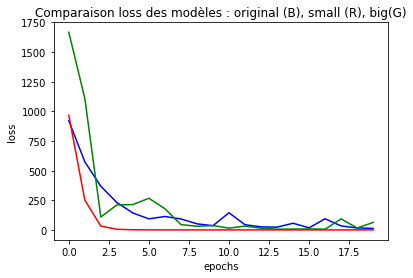

In [ ]:
original_val_loss = original_history.history['val_loss']
small_val_loss = small_history.history['val_loss']
big_val_loss = big_history.history['val_loss']
plt.figure()
plt.plot(range(20), original_val_loss, color = 'blue')
plt.plot(range(20), small_val_loss, color = 'red')
plt.plot(range(20), big_val_loss, 'green')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Comparaison loss des modèles : original (B), small (R), big(G)")
plt.show()

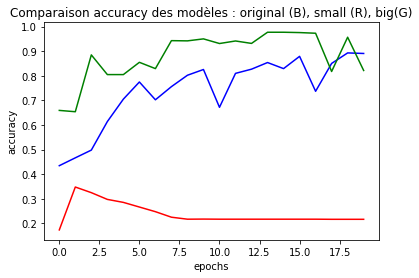

In [ ]:
original_val_acc = original_history.history['val_acc']
small_val_acc = small_history.history['val_acc']
big_val_acc = big_history.history['val_acc']

plt.figure()
plt.plot(range(20), original_val_acc, color = 'blue')
plt.plot(range(20), small_val_acc, color = 'red')
plt.plot(range(20), big_val_acc, 'green')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Comparaison accuracy des modèles : original (B), small (R), big(G)")
plt.show()

Comparaison entre toutes les variantes du modèle original

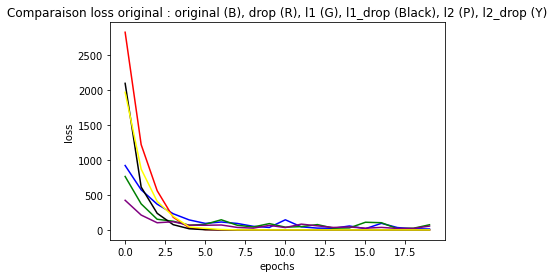

In [ ]:
original_val_loss = original_history.history['val_loss']
drop_val_loss = drop_history.history['val_loss']
l1_val_loss = l1_history.history['val_loss']
l1_val_dpt_loss = l1_history_dpt.history['val_loss']
l2_val_loss = l2_history.history['val_loss']
l2_val_dpt_loss = l2_history_dpt.history['val_loss']

plt.figure()
plt.plot(range(20), original_val_loss, color = 'blue')
plt.plot(range(20), drop_val_loss, color = 'red')
plt.plot(range(20), l1_val_loss, 'green')
plt.plot(range(20), l1_val_dpt_loss, color = 'black')
plt.plot(range(20), l2_val_loss, color = 'purple')
plt.plot(range(20), l2_val_dpt_loss, 'yellow')

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Comparaison loss original : original (B), drop (R), l1 (G), l1_drop (Black), l2 (P), l2_drop (Y)")
plt.show()

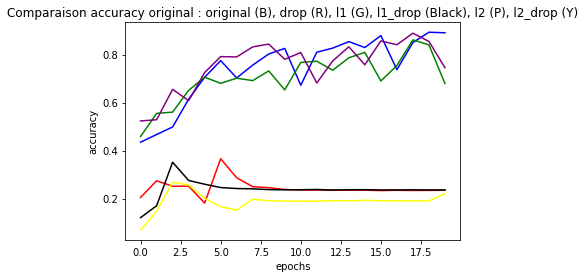

In [ ]:
original_val_acc = original_history.history['val_acc']
drop_val_acc = drop_history.history['val_acc']
l1_val_acc = l1_history.history['val_acc']
l1_val_dpt_acc = l1_history_dpt.history['val_acc']
l2_val_acc = l2_history.history['val_acc']
l2_val_dpt_acc = l2_history_dpt.history['val_acc']

plt.figure()
plt.plot(range(20), original_val_acc, color = 'blue')
plt.plot(range(20), drop_val_acc, color = 'red')
plt.plot(range(20), l1_val_acc, 'green')
plt.plot(range(20), l1_val_dpt_acc, color = 'black')
plt.plot(range(20), l2_val_acc, color = 'purple')
plt.plot(range(20), l2_val_dpt_acc, 'yellow')

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Comparaison accuracy original : original (B), drop (R), l1 (G), l1_drop (Black), l2 (P), l2_drop (Y)")
plt.show()

Comparaison entre toutes les variantes du modèle small

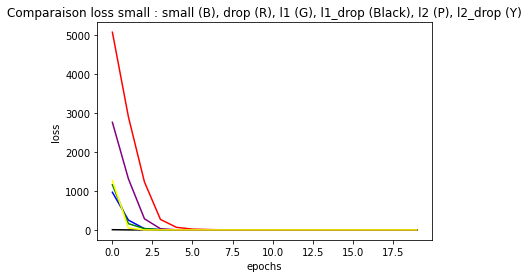

In [ ]:
small_val_loss = small_history.history['val_loss']
drop_val_sm_loss = drop_history_sm.history['val_loss']
l1_val_sm_loss = l1_history_sm.history['val_loss']
l1_val_dpt_sm_loss = l1_history_dpt_sm.history['val_loss']
l2_val_sm_loss = l2_history_sm.history['val_loss']
l2_val_dpt_sm_loss = l2_history_dpt_sm.history['val_loss']

plt.figure()
plt.plot(range(20), small_val_loss, color = 'blue')
plt.plot(range(20), drop_val_sm_loss, color = 'red')
plt.plot(range(20), l1_val_sm_loss, 'green')
plt.plot(range(20), l1_val_dpt_sm_loss, color = 'black')
plt.plot(range(20), l2_val_sm_loss, color = 'purple')
plt.plot(range(20), l2_val_dpt_sm_loss, 'yellow')

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Comparaison loss small : small (B), drop (R), l1 (G), l1_drop (Black), l2 (P), l2_drop (Y)")
plt.show()

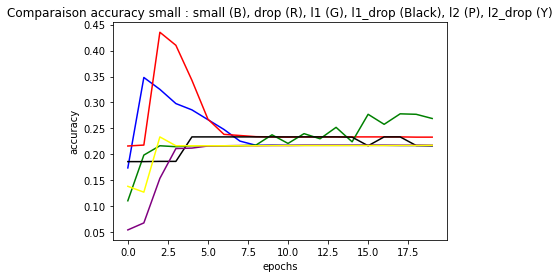

In [ ]:
small_val_acc = small_history.history['val_acc']
drop_val_sm_acc = drop_history_sm.history['val_acc']
l1_val_sm_acc = l1_history_sm.history['val_acc']
l1_val_dpt_sm_acc = l1_history_dpt_sm.history['val_acc']
l2_val_sm_acc = l2_history_sm.history['val_acc']
l2_val_dpt_sm_acc = l2_history_dpt_sm.history['val_acc']

plt.figure()
plt.plot(range(20), small_val_acc, color = 'blue')
plt.plot(range(20), drop_val_sm_acc, color = 'red')
plt.plot(range(20), l1_val_sm_acc, 'green')
plt.plot(range(20), l1_val_dpt_sm_acc, color = 'black')
plt.plot(range(20), l2_val_sm_acc, color = 'purple')
plt.plot(range(20), l2_val_dpt_sm_acc, 'yellow')

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Comparaison accuracy small : small (B), drop (R), l1 (G), l1_drop (Black), l2 (P), l2_drop (Y)")
plt.show()

Comparaison entre toutes les variantes du modèle big

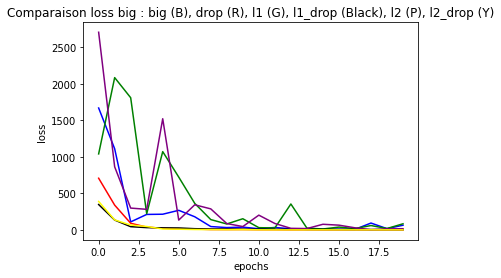

In [ ]:
big_val_loss = big_history.history['val_loss']
drop_val_bg_loss = drop_history_bg.history['val_loss']
l1_val_bg_loss = l1_history_bg.history['val_loss']
l1_val_dpt_bg_loss = l1_history_dpt_bg.history['val_loss']
l2_val_bg_loss = l2_history_bg.history['val_loss']
l2_val_dpt_bg_loss = l2_history_dpt_bg.history['val_loss']

plt.figure()
plt.plot(range(20), big_val_loss, color = 'blue')
plt.plot(range(20), drop_val_bg_loss, color = 'red')
plt.plot(range(20), l1_val_bg_loss, 'green')
plt.plot(range(20), l1_val_dpt_bg_loss, color = 'black')
plt.plot(range(20), l2_val_bg_loss, color = 'purple')
plt.plot(range(20), l2_val_dpt_bg_loss, 'yellow')

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Comparaison loss big : big (B), drop (R), l1 (G), l1_drop (Black), l2 (P), l2_drop (Y)")
plt.show()

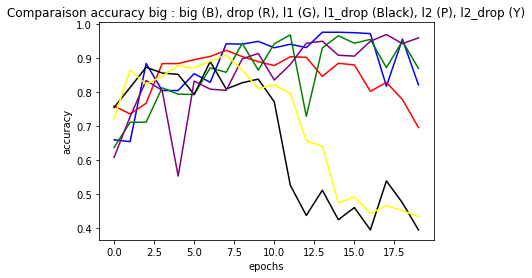

In [ ]:
big_val_acc = big_history.history['val_acc']
drop_val_bg_acc = drop_history_bg.history['val_acc']
l1_val_bg_acc = l1_history_bg.history['val_acc']
l1_val_dpt_bg_acc = l1_history_dpt_bg.history['val_acc']
l2_val_bg_acc = l2_history_bg.history['val_acc']
l2_val_dpt_bg_acc = l2_history_dpt_bg.history['val_acc']

plt.figure()
plt.plot(range(20), big_val_acc, color = 'blue')
plt.plot(range(20), drop_val_bg_acc, color = 'red')
plt.plot(range(20), l1_val_bg_acc, 'green')
plt.plot(range(20), l1_val_dpt_bg_acc, color = 'black')
plt.plot(range(20), l2_val_bg_acc, color = 'purple')
plt.plot(range(20), l2_val_dpt_bg_acc, 'yellow')

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Comparaison accuracy big : big (B), drop (R), l1 (G), l1_drop (Black), l2 (P), l2_drop (Y)")
plt.show()

## Le modèle le plus performant est donc le modèle Big L2 (environ 0.95 d'accuracy et une loss faible)

# Nous choissisons donc le modèle Big L2 comme modèle de réfèrence pour ajuster les hyperparamètres

## Learning rate

In [ ]:
def fit_model(trainX, trainy, testX, testy, lrate):
  model = keras.Sequential([    
                           keras.layers.Dense(512, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
                           keras.layers.Dense(512, activation='relu',  input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
                           keras.layers.Dense(7, activation='sigmoid')
                           ])
  # compile model
  model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.SGD(learning_rate = lrate ), metrics =['accuracy'])
  history = model.fit( trainX , trainy ,validation_data = (testX ,testy), epochs = 20 , verbose =0)
  plt.plot(history.history['accuracy'], label ='train', color = 'r')
  plt.plot(history.history['val_accuracy'], label ='test', color = 'b')
  plt.title('lrate ='+ str (lrate), pad = -50)

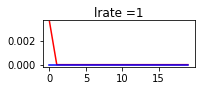

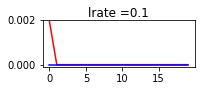

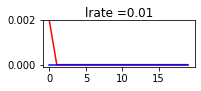

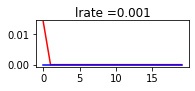

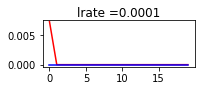

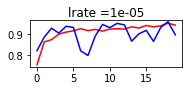

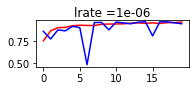

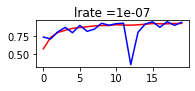

In [ ]:
learning_rates = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
for i in range (len(learning_rates)):
  # determine the plot number
  plot_no = 420 + (i + 1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a learning rate
  fit_model(trainX ,trainy ,testX ,testy ,learning_rates[i])
  # show learning curves
  plt.show()

Le learning rate fixé à 1*E-5 est clairement le plus efficace (environ 0.9 d'accuracy)

# Momentum

In [ ]:
def fit_model(trainX, trainy, testX, testy, momentum):
  # define model
  model = keras.Sequential([    
                           keras.layers.Dense(512, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
                           keras.layers.Dense(512, activation='relu',  input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
                           keras.layers.Dense(7, activation='sigmoid')
                           ])
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.SGD(learning_rate= 0.00001, momentum= momentum), metrics=['accuracy'])
  # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=20, verbose=0)
  # plot learning curves
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.title('momentum='+str(momentum), pad=-80)

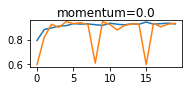

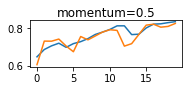

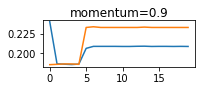

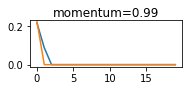

In [ ]:
momentums = [0.0, 0.5, 0.9, 0.99]
for i in range (len(momentums)):
  # determine the plot number
  plot_no = 420 + (i + 1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a learning rate
  fit_model(trainX ,trainy ,testX ,testy ,momentums[i])
  # show learning curves
  plt.show()

Le momentum fixé à 0 est clairement le plus efficace (environ 0.9 d'accuracy)

# Decay

In [ ]:
def decay_lrate(initial_lrate, decay, iteration):
  return initial_lrate*(1.0/(1.0 + decay *iteration))

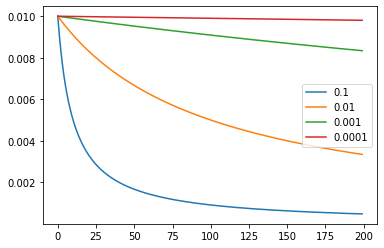

In [ ]:
decays = [0.1, 0.01, 0.001, 0.0001]
lrate = 0.01
n_updates = 200
for decay in decays:
  lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
  plt.plot(lrates, label = str(decay))
plt.legend()
plt.show()

In [ ]:
def fit_model(trainX, trainy, testX, testy, decay):
  # define model
  model = keras.Sequential([    
                           keras.layers.Dense(512, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
                           keras.layers.Dense(512, activation='relu',  input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
                           keras.layers.Dense(7, activation='sigmoid')
                           ])
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.SGD(learning_rate= 0.00001, decay= decay), metrics=['accuracy'])
  # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=20, verbose=0)
  # plot learning curves
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.title('decay='+str(decay), pad=-80)

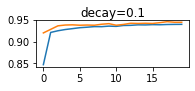

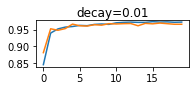

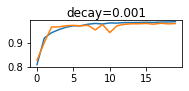

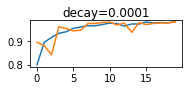

In [ ]:
decays = [0.1, 0.01, 0.001, 0.0001]
for i in range (len(decays)):
  # determine the plot number
  plot_no = 420 + (i + 1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a learning rate
  fit_model(trainX ,trainy ,testX ,testy ,decays[i])
  # show learning curves
  plt.show()

Le decay fixé à 0.01 est clairement le plus efficace (environ 0.95 d'accuracy et une concordance élevée entre le train et le test)

# Optimizer

In [ ]:
def fit_model(trainX, trainy, testX, testy, optimizer):
  # define model
  model = keras.Sequential([    
                           keras.layers.Dense(512, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
                           keras.layers.Dense(512, activation='relu',  input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
                           keras.layers.Dense(7, activation='sigmoid')
                           ])
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
  # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=20, verbose=0)
  # plot learning curves
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.title('optimizer='+str(optimizer), pad=-80)

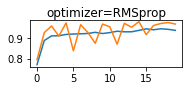

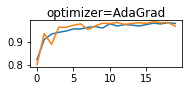

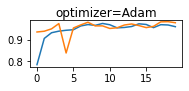

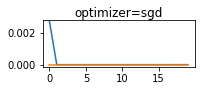

In [ ]:
optimizers = ['RMSprop', 'AdaGrad', 'Adam', 'sgd']
for i in range (len(optimizers)):
  # determine the plot number
  plot_no = 420 + (i + 1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a learning rate
  fit_model(trainX ,trainy ,testX ,testy ,optimizers[i])
  # show learning curves
  plt.show()

L'optimizer fixé à Adam est clairement le plus eficace (environ 0.95 d'accuracy)

# Nous sélectionnons donc les hyperparamètres suivants : learning_rate = 1*E-5, momentum = 0, decay = 0.01 pour l'optimisation manuelle et optimizer = Adam pour l'optimisation automatique

In [ ]:
model_manuel = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dense(512, activation='relu',  input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dense(7, activation='sigmoid')
])
model_manuel.compile(optimizer = keras.optimizers.SGD(learning_rate= 0.00001, decay= 0.01, momentum = 0),
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])

In [ ]:
model_auto = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dense(512, activation='relu',  input_dim=128, kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dense(7, activation='sigmoid')
])
model_auto.compile(optimizer = 'Adam',
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])

In [ ]:
history_model_manuel = model_manuel.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 27ms/step - loss: 15047.7208 - acc: 0.3222 - val_loss: 131.8255 - val_acc: 0.6361
Epoch 2/20
18/18 [==============================] - 0s 8ms/step - loss: 73.6633 - acc: 0.7794 - val_loss: 21.6090 - val_acc: 0.9039
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 26.2335 - acc: 0.9011 - val_loss: 21.0579 - val_acc: 0.8895
Epoch 4/20
18/18 [==============================] - 0s 8ms/step - loss: 23.8744 - acc: 0.9131 - val_loss: 15.6219 - val_acc: 0.9173
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 21.7698 - acc: 0.9201 - val_loss: 14.6516 - val_acc: 0.9173
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 18.9628 - acc: 0.9233 - val_loss: 13.7094 - val_acc: 0.9322
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 16.6194 - acc: 0.9349 - val_loss: 11.8552 - val_acc: 0.9259
Epoch 8/20
18/18 [==============================] - 0s 7ms/step - loss:

In [ ]:
history_model_auto = model_auto.fit(trainX ,trainy , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
18/18 [==============================] - 1s 25ms/step - loss: 4968.8097 - acc: 0.4417 - val_loss: 860.7199 - val_acc: 0.6348
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 559.9739 - acc: 0.7434 - val_loss: 142.6358 - val_acc: 0.8226
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 101.4798 - acc: 0.8596 - val_loss: 59.4928 - val_acc: 0.9227
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 61.4188 - acc: 0.9000 - val_loss: 30.1463 - val_acc: 0.9412
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 23.6456 - acc: 0.9434 - val_loss: 38.2311 - val_acc: 0.9102
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 36.5275 - acc: 0.9168 - val_loss: 37.7739 - val_acc: 0.8859
Epoch 7/20
18/18 [==============================] - 0s 8ms/step - loss: 30.6368 - acc: 0.9163 - val_loss: 105.8221 - val_acc: 0.8724
Epoch 8/20
18/18 [==============================] - 0s 7ms/step - lo

In [ ]:
test_loss_manuel, test_acc_manuel = model_manuel.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 5.5863 - acc: 0.9474


In [ ]:
test_loss_auto, test_acc_auto = model_auto.evaluate(testX ,testy ,verbose = 2)

70/70 - 0s - loss: 33.8348 - acc: 0.9677


## On choisit donc l'optimisation automatique (accuracy plus élevée) !

# Application du modèle sur le dataset test

In [ ]:
uploaded = files.upload()

Saving phpbL6t4U_test.csv to phpbL6t4U_test (1).csv


In [ ]:
test = pd.read_csv(io.BytesIO(uploaded['phpbL6t4U_test.csv']), sep =',', header = None)

In [ ]:
x = test.iloc[:,0:128]

In [ ]:
y = test.iloc[:,-1]

In [ ]:
y = to_categorical(y)

In [ ]:
history_model_auto = model_auto.fit(x ,y , epochs = 20, batch_size = 512, validation_data=(testX, testy))

Epoch 1/20
6/6 [==============================] - 0s 18ms/step - loss: 37.8232 - acc: 0.9569
Epoch 2/20
6/6 [==============================] - 0s 10ms/step - loss: 29.4964 - acc: 0.9515
Epoch 3/20
6/6 [==============================] - 0s 10ms/step - loss: 35.1887 - acc: 0.9277
Epoch 4/20
6/6 [==============================] - 0s 10ms/step - loss: 20.8462 - acc: 0.9529
Epoch 5/20
6/6 [==============================] - 0s 10ms/step - loss: 22.9637 - acc: 0.9540
Epoch 6/20
6/6 [==============================] - 0s 10ms/step - loss: 21.5928 - acc: 0.9651
Epoch 7/20
6/6 [==============================] - 0s 11ms/step - loss: 17.9569 - acc: 0.9676
Epoch 8/20
6/6 [==============================] - 0s 13ms/step - loss: 17.2446 - acc: 0.9752
Epoch 9/20
6/6 [==============================] - 0s 11ms/step - loss: 16.4059 - acc: 0.9644
Epoch 10/20
6/6 [==============================] - 0s 10ms/step - loss: 22.7668 - acc: 0.9612
Epoch 11/20
6/6 [==============================] - 0s 10ms/step - los

In [ ]:
test_loss, test_acc = model_auto.evaluate(x ,y ,verbose = 2)

87/87 - 0s - loss: 29.8070 - acc: 0.9745


# On obtient une accuracy de 0.9745 !